In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output, display, Math, Latex
from atlas_ml import *

In [2]:
# Simple Train/test split seems to cause a high error - Shuffle df for better results
df = pd.read_csv('Datasets/Regression/ex2data1.csv')
A2 = df.values.T
X1 = A2[0:2,0:-10]
X2 = normalize(X1)
Y1 = A2[2:3,0:-10]
Y2 = one_hot(Y1,2)
X1_test = A2[0:2,-10:]
X2_test = normalize(X1_test)
Y1_test = A2[2:3,-10:]
Y2_test = one_hot(Y1_test,2)

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    if axes == None:
        axes = plt.gca()
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [4]:
n_in = np.shape(X2)[0]
n_out = np.shape(Y2)[0]
log_reg = Logistic(n_in,n_out,CE_loss)

In [5]:
H = log_reg.f_pass(X2)

In [6]:
n_epochs = 100
lr = 0.01
lr_decay = 1
batch_size = 10
beta = 0

#regularization parameter labmda
reg_lamda = 1

epoch:100/100 | Loss:0.0815 |             Train Accuracy: 0.9000 | Test_Accuracy:0.8000


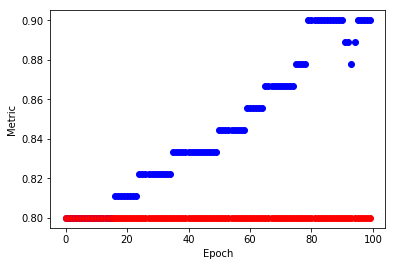

In [7]:
train(log_reg, X2, Y2, X2_test, Y2_test, model_accuracy, n_epochs, batch_size, lr, lr_decay, beta, reg_lamda)

In [8]:
H = log_reg.f_pass(X2)
H2 = inv_one_hot(H)
A3 = np.vstack([X1,H2])

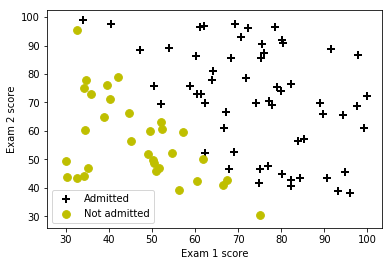

In [9]:
plotData(A3.T, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')


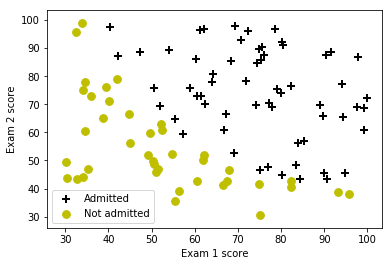

In [10]:
plotData(A2.T, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [11]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
print("confusion matrix:\n", confusion_matrix(Y1.T, H2.T))
print("precision, recall, f1_score, support:\n", precision_recall_fscore_support(Y1.T,H2.T, average='micro'))

confusion matrix:
 [[31  8]
 [ 1 50]]
precision, recall, f1_score, support:
 (0.9, 0.9, 0.9, None)


In [12]:
Y1.shape
H2.shape


(1, 90)